In [1]:
import torch as to
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Build the model
class Model(nn.Module):
    # Input_features --> h1 --> h2 --> Output_features
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # first full connections gets 4(=in_features) inputs and gives 8(=h1) outputs
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # we give input features to fc1 and store the output of fc1 to x again
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
# Create an instance of the Model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
# Encode the last column
my_df['variety'] = my_df['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = my_df.drop('variety', axis = 1).values
y = my_df['variety'].values

In [9]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Convert to tensors
X_train = to.FloatTensor(X_train)
X_test = to.FloatTensor(X_test)
y_train = to.LongTensor(y_train)
y_test = to.LongTensor(y_test)

In [11]:
# Train the model
epochs = 100
loss_function = nn.CrossEntropyLoss()
opt = to.optim.Adam(model.parameters(), lr = 0.01)
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)

    loss = loss_function(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"run : {i} -> loss = {loss}")

    opt.zero_grad()
    loss.backward()
    opt.step()

run : 0 -> loss = 1.1295794248580933
run : 10 -> loss = 0.8789656758308411
run : 20 -> loss = 0.642831027507782
run : 30 -> loss = 0.4261949360370636
run : 40 -> loss = 0.2748643457889557
run : 50 -> loss = 0.16909533739089966
run : 60 -> loss = 0.11269524693489075
run : 70 -> loss = 0.08711382001638412
run : 80 -> loss = 0.0751919224858284
run : 90 -> loss = 0.06897200644016266


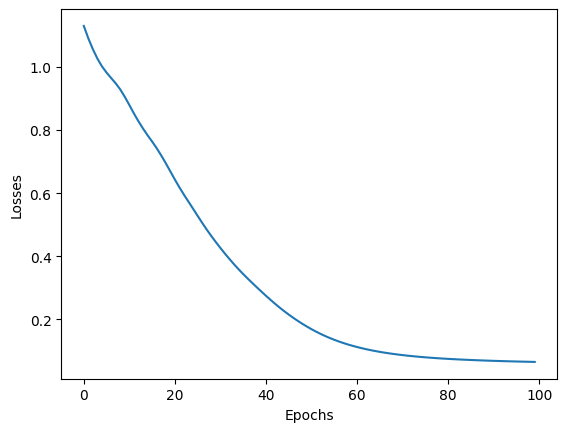

In [12]:
# Plot losses
plt.plot(range(epochs), losses)
plt.ylabel('Losses')
plt.xlabel('Epochs')
plt.show()

In [13]:
# Test model
with to.no_grad():
    y_pred = model.forward(X_test)
    loss = loss_function(y_pred, y_test)
print(loss)

tensor(0.0252)


In [14]:
with to.no_grad():
    guessed = 0
    for i,data in enumerate(y_pred):
        print(f"{i+1}.) pred : {str(data)} \t truth : {str(y_test[i])} \t {data.argmax().item() == y_test[i]}")
        if data.argmax().item() == y_test[i]:
            guessed += 1
    print(f"Corrects : {guessed} \t Accuracy : {round(100*guessed/len(y_pred), 6)}%")

1.) pred : tensor([-9.6363,  2.0671, 10.5442]) 	 truth : tensor(2) 	 True
2.) pred : tensor([0.2566, 6.0033, 0.0811]) 	 truth : tensor(1) 	 True
3.) pred : tensor([ 13.9301,   6.9099, -11.7759]) 	 truth : tensor(0) 	 True
4.) pred : tensor([-8.5828,  4.2632,  9.5003]) 	 truth : tensor(2) 	 True
5.) pred : tensor([ 11.8658,   6.0207, -10.0989]) 	 truth : tensor(0) 	 True
6.) pred : tensor([-11.1944,   2.1253,  12.3132]) 	 truth : tensor(2) 	 True
7.) pred : tensor([ 12.0959,   6.0544, -10.2865]) 	 truth : tensor(0) 	 True
8.) pred : tensor([-1.3348,  6.7306,  1.6790]) 	 truth : tensor(1) 	 True
9.) pred : tensor([-1.7723,  6.5759,  2.1256]) 	 truth : tensor(1) 	 True
10.) pred : tensor([0.3569, 6.2182, 0.0214]) 	 truth : tensor(1) 	 True
11.) pred : tensor([-6.5499,  4.2734,  7.2200]) 	 truth : tensor(2) 	 True
12.) pred : tensor([-0.8847,  6.5794,  1.2361]) 	 truth : tensor(1) 	 True
13.) pred : tensor([-1.5047,  6.3415,  1.8037]) 	 truth : tensor(1) 	 True
14.) pred : tensor([-2.0551,

In [17]:
# Add new data
new_data = to.Tensor([[6.5, 3.3, 5.1, 2.2]])
pred = model.forward(new_data)
print(pred.argmax().item())

2


In [18]:
# Save the nn
to.save(model.state_dict(), 'iris_nn.pt')

In [19]:
# Load the model
new_model = Model()
new_model.load_state_dict(to.load('iris_nn.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)